
INSTALAÇÃO DAS BIBLIOTECAS : PANDAS E PANDERA .

In [142]:
pip install pandera

In [143]:
pip install gcsfs

In [144]:
import pandas as pd
import pandera as pa

In [145]:
import os
from google.cloud import storage
serviceAccount = '/content/Chave_Ingestao_Apache.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [146]:
df = pd.read_csv('gs://projeto-final-grupo09/entrada_dados/dataZAP.csv', sep=";")
df.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,account.licenseNumber,account.name,imvl_type,listing.acceptExchange,listing.address.city,listing.address.confidence,listing.address.country,listing.address.level,listing.address.neighborhood,listing.address.point.lat,listing.address.point.lon,listing.address.point.source,listing.address.precision,listing.address.state,listing.address.street,listing.address.streetNumber,listing.address.zipCode,listing.address.zone,listing.advertiserId,listing.amenities,listing.backyard,listing.barbgrill,listing.bathrooms,listing.bathtub,listing.bedrooms,listing.businessTypeContext,listing.createdAt,listing.description,listing.displayAddressType,listing.externalId,listing.fireplace,listing.floors,listing.furnished,listing.garden,listing.guestpark,listing.gym,listing.hottub,listing.id,listing.isInactive,listing.legacyId,listing.link,listing.listingType,listing.mountainview,listing.parkingSpaces,listing.partyhall,listing.playground,listing.pool,listing.portal,listing.preview,listing.pricingInfo.businessLabel,listing.pricingInfo.businessType,listing.pricingInfo.isRent,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.period,listing.pricingInfo.price,listing.pricingInfo.rentalPrice,listing.pricingInfo.rentalTotalPrice,listing.pricingInfo.salePrice,listing.pricingInfo.yearlyIptu,listing.propertyType,listing.publicationType,listing.sauna,listing.soundproofing,listing.sportcourt,listing.subtitle,listing.suites,listing.tenniscourt,listing.title,listing.totalAreas,listing.unitFloor,listing.unitSubTypes,listing.unitTypes,listing.unitsOnTheFloor,listing.updatedAt,listing.usableAreas,listing.usageTypes,type
0,04268-J-SP,ADI Assessoria e Imóveis Ltda,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Parada Inglesa,-23.493796,-46.605705,GOOGLE,GEOMETRIC_CENTER,São Paulo,Rua Manajeru,normal,normal,Zona Norte,7bf57a4f-0a40-781d-c7b0-5af8f92bd22d,normal,False,False,1,False,2,RENTAL,2020-06-17T10:12:05.109Z,LINDO APARTAMENTO PARADA INGLESA<br><br>2 DORM...,ALL,2481,False,normal,False,False,False,False,False,2486576702,False,normal,/imovel/aluguel-apartamento-2-quartos-parada-i...,USED,False,normal,False,False,False,ZAP,False,Alugar,RENTAL,True,False,50,mês,1.300,1.300,1.350,normal,50,UNIT,SUPER_PREMIUM,False,False,False,Apartamento para alugar em,normal,False,SãO PAULO - Apartamento Padrão - Parada Inglesa,45,0,normal,APARTMENT,0,2020-07-24T05:06:08.843Z,45,RESIDENTIAL,superPremium


BACK UP ARQUIVO , ANTES DO TRATAMENTO :

In [147]:
dfback = df

LIMPEZA DOS DADOS

Após análise dos dados contidos na tabela ficou estabelecidas as seguintes colunas a serem excluídas:

*   listing.acceptExchange
*   listing.address.confidence
*   listing.address.point.lat
*   listing.address.point.lon
*   listing.address.zipCode
*   listing.amenities
*   listing.backyard
*   listing.barbgrill
*   listing.bathtub
*   listing.description
*   listing.displayAddressType
*   listing.fireplace
*   listing.floors
*   listing.garden
*   listing.guestpark
*   listing.hottub
*   listing.link
*   listing.mountainview
*   listing.partyhall
*   listing.preview
*   listing.pricingInfo.businessLabel
*   listing.pricingInfo.businessType
*   listing.pricingInfo.isRent
*   listing.pricingInfo.isSale
*   listing.pricingInfo.rentalPrice
*   listing.pricingInfo.price
*   listing.propertyType
*   listing.publicationType
*   listing.sauna
*   listing.soundproofing
*   listing.sportcourt
*   listing.title
*   listing.unitFloor
*   listing.unitSubTypes
*   listing.updatedAt
*   type
*   listing.advertiserId
*   listing.usableAreas
*   listing.address.level
*   listing.address.precision
*   listing.externalId
*   listing.id
*   listing.legacyId
*   listing.unitTypes
*   listing.address.country
*   listing.listingType
*   listing.address.country
*   listing.address.neighborhood
*   listing.address.street
*   listing.address.streetNumber
*   listing.address.zone
*   listing.listingType 
*   account.licenseNumber	



In [148]:
#Exclusão das colunas
df.drop(['listing.acceptExchange',
         'listing.address.confidence',
         'listing.address.point.lat',
         'listing.address.point.lon',
         'listing.address.zipCode',
         'listing.amenities',
         'listing.backyard',
         'listing.barbgrill',
         'listing.bathtub',
         'listing.description',
         'listing.displayAddressType',
         'listing.fireplace',
         'listing.floors',
         'listing.garden',
         'listing.guestpark', 
         'listing.hottub',
         'listing.link',
         'listing.mountainview',
         'listing.partyhall',
         'listing.preview',
         'listing.pricingInfo.businessLabel',
         'listing.pricingInfo.businessType',
         'listing.pricingInfo.isRent',
         'listing.pricingInfo.isSale',
         'listing.pricingInfo.rentalTotalPrice',
         'listing.pricingInfo.price', 
         'listing.propertyType',
         'listing.publicationType',
         'listing.sauna',
         'listing.soundproofing',
         'listing.sportcourt',
         'listing.subtitle',
         'listing.title',
         'listing.unitFloor',
         'listing.unitSubTypes',
         'listing.updatedAt',
         'type',
         'listing.advertiserId',
         'listing.usableAreas',
         'listing.address.level',
         'listing.address.precision',
         'listing.externalId',
         'listing.externalId',
         'listing.id',
         'listing.legacyId',
         'listing.unitTypes',
         'listing.address.country',
         'listing.address.neighborhood',
         'listing.address.street',
         'listing.address.streetNumber',
         'listing.address.zone',
         'listing.listingType',
         'account.licenseNumber',
         'type'], axis=1, inplace = True)

In [149]:
#Confirmando a exclusão
df.head(1)

,account.name,imvl_type,listing.address.city,listing.address.point.source,listing.address.state,listing.bathrooms,listing.bedrooms,listing.businessTypeContext,listing.createdAt,listing.furnished,listing.gym,listing.isInactive,listing.parkingSpaces,listing.playground,listing.pool,listing.portal,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.period,listing.pricingInfo.rentalPrice,listing.pricingInfo.salePrice,listing.pricingInfo.yearlyIptu,listing.suites,listing.tenniscourt,listing.totalAreas,listing.unitsOnTheFloor,listing.usageTypes
0,ADI Assessoria e Imóveis Ltda,apartamentos,São Paulo,GOOGLE,São Paulo,1,2,RENTAL,2020-06-17T10:12:05.109Z,False,False,False,normal,False,False,ZAP,50,mês,1.300,normal,50,normal,False,45,0,RESIDENTIAL


RENOMEANDO AS COLUNAS (TRADUÇÃO)

In [150]:
df.rename(columns={'listing.createdAt':'dt_criacao_lista',
                   'account.name': 'nome_empresa',
                   'imvl_type':'tipo_imovel',
                   'listing.address.city':'cidade_imovel',
                   'listing.address.point.source': 'site_pesquisa',
                   'listing.address.state':'estado_imovel',
                   'listing.bathrooms':'qtde_banheiros',
                   'listing.bedrooms':'qtde_quartos',
                   'listing.businessTypeContext': 'tipo_contrato',
                   'listing.furnished':'mobilhado',
                   'listing.gym' :'academia',
                   'listing.isInactive':'desocupado',
                   'listing.parkingSpaces':'garagem',
                   'listing.playground': 'area_lazer',
                   'listing.pool':'piscina',
                   'listing.portal':'plataforma_digital',
                   'listing.pricingInfo.monthlyCondoFee':'preco_condominio',
                   'listing.pricingInfo.period':'preco_periodo',
                   'listing.pricingInfo.rentalPrice':'valor_aluguel',
                   'listing.pricingInfo.salePrice':'valor_venda',
                   'listing.pricingInfo.yearlyIptu':'iptu_anual',
                   'listing.suites':'qtde_suites',
                   'listing.tenniscourt':'quadra_tenis',
                   'listing.totalAreas':'area_total_m2',
                   'listing.unitsOnTheFloor':'andar',
                   'listing.usageTypes':'residencial_comercial'}, inplace =True)


In [151]:
#CONFERINDO OS NOMES:
df.head(5)

,nome_empresa,tipo_imovel,cidade_imovel,site_pesquisa,estado_imovel,qtde_banheiros,qtde_quartos,tipo_contrato,dt_criacao_lista,mobilhado,academia,desocupado,garagem,area_lazer,piscina,plataforma_digital,preco_condominio,preco_periodo,valor_aluguel,valor_venda,iptu_anual,qtde_suites,quadra_tenis,area_total_m2,andar,residencial_comercial
0,ADI Assessoria e Imóveis Ltda,apartamentos,São Paulo,GOOGLE,São Paulo,1,2,RENTAL,2020-06-17T10:12:05.109Z,False,False,False,normal,False,False,ZAP,50,mês,1.300,normal,50,normal,False,45,0,RESIDENTIAL
1,San Remos Imóveis,apartamentos,Florianópolis,GOOGLE,Santa Catarina,3,3,RENTAL,2020-07-10T23:40:26.142Z,False,False,False,1,False,False,ZAP,1.961,mês,3.600,normal,370,1,False,140,0,RESIDENTIAL
2,Família Bacellar Imobiliária,apartamentos,Rio de Janeiro,GOOGLE,Rio de Janeiro,3,3,RENTAL,2020-07-23T21:43:24.010Z,False,False,False,2,False,False,ZAP,835,mês,2.100,normal,244,1,False,100,0,RESIDENTIAL
3,Next Soluções Imobiliárias,apartamentos,Campinas,GOOGLE,São Paulo,2,1,RENTAL,2016-12-12T04:15:29.087Z,False,False,False,1,False,True,ZAP,134.437,mês,3.000,normal,90,0,False,80,0,RESIDENTIAL
4,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamentos,São Paulo,GOOGLE,São Paulo,3,2,RENTAL,2020-07-28T22:32:55.573Z,False,False,False,2,True,True,ZAP,536,mês,2.600,normal,17,2,False,69,0,RESIDENTIAL


In [152]:
pd.set_option('float_format', '{:.3f}'.format)

In [153]:
df.head(30)

,nome_empresa,tipo_imovel,cidade_imovel,site_pesquisa,estado_imovel,qtde_banheiros,qtde_quartos,tipo_contrato,dt_criacao_lista,mobilhado,academia,desocupado,garagem,area_lazer,piscina,plataforma_digital,preco_condominio,preco_periodo,valor_aluguel,valor_venda,iptu_anual,qtde_suites,quadra_tenis,area_total_m2,andar,residencial_comercial
0,ADI Assessoria e Imóveis Ltda,apartamentos,São Paulo,GOOGLE,São Paulo,1,2,RENTAL,2020-06-17T10:12:05.109Z,False,False,False,normal,False,False,ZAP,50,mês,1.300,normal,50,normal,False,45,0,RESIDENTIAL
1,San Remos Imóveis,apartamentos,Florianópolis,GOOGLE,Santa Catarina,3,3,RENTAL,2020-07-10T23:40:26.142Z,False,False,False,1,False,False,ZAP,1.961,mês,3.600,normal,370,1,False,140,0,RESIDENTIAL
2,Família Bacellar Imobiliária,apartamentos,Rio de Janeiro,GOOGLE,Rio de Janeiro,3,3,RENTAL,2020-07-23T21:43:24.010Z,False,False,False,2,False,False,ZAP,835,mês,2.100,normal,244,1,False,100,0,RESIDENTIAL
3,Next Soluções Imobiliárias,apartamentos,Campinas,GOOGLE,São Paulo,2,1,RENTAL,2016-12-12T04:15:29.087Z,False,False,False,1,False,True,ZAP,134.437,mês,3.000,normal,90,0,False,80,0,RESIDENTIAL
4,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamentos,São Paulo,GOOGLE,São Paulo,3,2,RENTAL,2020-07-28T22:32:55.573Z,False,False,False,2,True,True,ZAP,536,mês,2.600,normal,17,2,False,69,0,RESIDENTIAL
5,FLAVIA DANIELLE PEREIRA TAGARRO,apartamentos,Rio de Janeiro,GOOGLE,Rio de Janeiro,1,2,RENTAL,2020-07-22T19:06:38.831Z,True,True,False,1,False,True,ZAP,809,mês,2.500,normal,236,1,False,64,0,RESIDENTIAL
6,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamentos,São Paulo,GOOGLE,São Paulo,2,1,RENTAL,2020-07-25T09:43:32.289Z,True,False,False,1,False,True,ZAP,880,mês,4.900,normal,109,1,False,67,0,RESIDENTIAL
7,LELLO IMÓVEIS TATUAPÉ LOCAÇÃO,apartamentos,São Paulo,GOOGLE,São Paulo,2,2,RENTAL,2020-07-16T11:08:44.065Z,False,True,False,1,False,True,ZAP,800,mês,1.900,normal,132,1,False,73,0,RESIDENTIAL
8,NBI IMOVEIS,apartamentos,São José do Rio Preto,GOOGLE,São Paulo,2,2,RENTAL,2020-07-28T02:09:15.156Z,False,False,False,1,False,False,GRUPOZAP,450,mês,1.400,normal,73,2,False,70,0,RESIDENTIAL
9,PORTAL ADMINISTRAÇÃO DE IMÓVEIS LTDA,apartamentos,Porto Alegre,GOOGLE,Rio Grande do Sul,1,2,RENTAL,2020-07-13T14:04:25.908Z,False,False,False,0,False,False,ZAP,260,mês,1.000,normal,30,0,False,64,2,RESIDENTIAL


In [154]:
df.shape

(35772, 26)

In [155]:
df.dtypes

nome_empresa              object
tipo_imovel               object
cidade_imovel             object
site_pesquisa             object
estado_imovel             object
qtde_banheiros            object
qtde_quartos               int64
tipo_contrato             object
dt_criacao_lista          object
mobilhado                   bool
academia                    bool
desocupado                  bool
garagem                   object
area_lazer                  bool
piscina                     bool
plataforma_digital        object
preco_condominio          object
preco_periodo             object
valor_aluguel            float64
valor_venda               object
iptu_anual                object
qtde_suites               object
quadra_tenis                bool
area_total_m2             object
andar                      int64
residencial_comercial     object
dtype: object

Verificado que alguns campos da tabela apareciam como "normal" o que poderia causar conflito durante a tratativa dos dados, assim, foi realizada a substituição de acordo com os dados contidos em cada coluna

In [156]:
sorted(pd.unique(df['nome_empresa']))

['100 POR CENTO TARGET IMOBILIARIA LTDA - ME',
 '111 IMOVEIS LTDA - ME',
 '123Mudei',
 '17 EMPREENDIMENTOS IMOBILIARIOS LTDA - ME',
 '2AP Imóveis',
 '3A  IMOBILIARIA',
 '3B Imoveis Ltda',
 '3B Imóveis',
 '3S Imóveis',
 '4Thorres Imoveis',
 '7Cantos',
 '7G7 Negócios Imobiliários',
 '7imóveis',
 'A & M Prime Imoveis',
 'A ACosta Imóveis Franca',
 'A BRANDALISE COMERCIO DE IMOVEIS LTDA - ME',
 'A DIRETRIZ ADMINISTRACAO DE IMOVEIS E CONDOMINIOS LTDA-EPP',
 'A G C IMOVEIS LIMITADA - ME',
 'A LOPES IMÓVEIS',
 'A R SANTIAGO CONSULTORIA DE IMOVEIS LTDA - ME',
 'A SANTOS CORRETORA DE IMOVEIS',
 'A&P IMOVEIS DF',
 'A&T NEGOCIOS IMOBILIARIOS E TURISMO LTDA - EPP',
 'A-SIIM Imóveis Imobiliária Ltda - ME',
 'A. Gonçalves Imóveis',
 'A. P Abreu Imóveis e Administração Ltda.\xa0',
 'A. QUEIROZ IMÓVEIS',
 'A.C.N. SABÓIA - CORRETORES DE IMÓVEIS',
 'A.TURRA IMOVEIS LTDA - ME',
 'A2 Jardins Negocios e Amigos Imobiliários',
 'A3 IMÓVEIS',
 'AABC Negócios Imobiliários',
 'AB Imóveis',
 'ABA Empreendimentos

In [157]:
sorted(pd.unique(df['tipo_imovel']))

['apartamentos',
 'casas',
 'casas-de-condominio',
 'casas-de-vila',
 'cobertura',
 'flat',
 'quitinetes',
 'studio']

In [158]:
#Renomeando as linhas da coluna "tipo_imovel"
df['tipo_imovel'].replace('apartamentos', 'apartamento', inplace=True)
df['tipo_imovel'].replace('casas', 'casa', inplace=True)
df['tipo_imovel'].replace('casas-de-condominio', 'casa-de-condominio', inplace=True)
df['tipo_imovel'].replace('casas-de-vila', 'casa-de-vila', inplace=True)
df['tipo_imovel'].replace('quitinetes', 'quitinete', inplace=True)
print(df['tipo_imovel'].unique())

['apartamento' 'casa-de-condominio' 'casa-de-vila' 'casa' 'cobertura'
 'flat' 'quitinete' 'studio']


In [159]:
sorted(pd.unique(df['cidade_imovel']))

['Almirante Tamandaré',
 'Alumínio',
 'Alvorada',
 'Americana',
 'Ananindeua',
 'Angra dos Reis',
 'Anápolis',
 'Aparecida de Goiânia',
 'Aquiraz',
 'Aracaju',
 'Aracoiaba da Serra',
 'Araraquara',
 'Araruama',
 'Araucária',
 'Araçatuba',
 'Areal',
 'Armação dos Búzios',
 'Arraial do Cabo',
 'Arujá',
 'Atibaia',
 'Bady Bassitt',
 'Bagé',
 'Balneário Camboriú',
 'Balneário Rincão',
 'Balsa Nova',
 'Barra Mansa',
 'Barra Velha',
 'Barra de São Miguel',
 'Barueri',
 'Bauru',
 'Belford Roxo',
 'Belo Horizonte',
 'Belém',
 'Bento Gonçalves',
 'Bertioga',
 'Betim',
 'Biguaçu',
 'Birigui',
 'Blumenau',
 'Boituva',
 'Bombinhas',
 'Botucatu',
 'Bragança Paulista',
 'Brasília',
 'Brodowski',
 'Brumadinho',
 'Brusque',
 'Cabedelo',
 'Cabo Frio',
 'Cabo de Santo Agostinho',
 'Cabreúva',
 'Cachoeirinha',
 'Caieiras',
 'Cajamar',
 'Caldas Novas',
 'Camaragibe',
 'Camaçari',
 'Camboriú',
 'Cambé',
 'Campinas',
 'Campo Grande',
 'Campo Largo',
 'Campo Limpo Paulista',
 'Campos do Jordão',
 'Campos dos

In [160]:
sorted(pd.unique(df['site_pesquisa'])) 

['GOOGLE', 'GRUPOZAP', 'GeoPointSource_NONE', 'PUBLISHER', 'normal']

In [161]:
#verificado dado "normal" e substituido por "Não informado"
df["site_pesquisa"].replace(['normal'] , "Não Informado", inplace=True)

In [162]:
#confirmando a substituição
sorted(pd.unique(df['site_pesquisa'])) 

['GOOGLE', 'GRUPOZAP', 'GeoPointSource_NONE', 'Não Informado', 'PUBLISHER']

In [163]:
sorted(pd.unique(df['estado_imovel']))

['Acre',
 'Alagoas',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Paraná',
 'Paraíba',
 'Pará',
 'Pernambuco',
 'Piauí',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondônia',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins']

In [164]:
sorted(pd.unique(df['tipo_contrato']))

['RENTAL', 'SALE']

In [165]:
#Renomeando as linhas da coluna "tipo_contrato"
df['tipo_contrato'].replace('RENTAL', 'Aluguel', inplace=True)
df['tipo_contrato'].replace('SALE', 'Venda', inplace=True)
print(df['tipo_contrato'].unique())

['Aluguel' 'Venda']


In [166]:
sorted(pd.unique(df['plataforma_digital']))

['GRUPOZAP', 'ZAP']

In [167]:
df["qtde_banheiros"].replace(['normal'] , "0", inplace=True)

In [168]:
df['qtde_banheiros'].astype(int).inplace=True

In [169]:
print(df['qtde_banheiros'].isna().sum())

0


In [170]:
sorted(pd.unique(df['qtde_quartos']))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14]

In [171]:
sorted(pd.unique(df['qtde_suites']))

['0', '1', '10', '14', '2', '3', '4', '46', '5', '6', '7', '8', 'normal']

In [172]:
df["qtde_suites"].replace(['normal'] , "0", inplace=True)

In [173]:
df['qtde_suites'].astype(int).inplace=True

In [174]:
sorted(pd.unique(df['qtde_suites']))

['0', '1', '10', '14', '2', '3', '4', '46', '5', '6', '7', '8']

In [175]:
sorted(pd.unique(df['garagem']))

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18',
 '2',
 '20',
 '24',
 '243',
 '3',
 '4',
 '40',
 '5',
 '6',
 '7',
 '8',
 '9',
 'normal']

In [176]:
df["garagem"].replace(['normal'] , "0", inplace=True)

In [177]:
df['garagem'].astype(int).inplace=True

In [178]:
sorted(pd.unique(df['garagem']))

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18',
 '2',
 '20',
 '24',
 '243',
 '3',
 '4',
 '40',
 '5',
 '6',
 '7',
 '8',
 '9']

In [179]:
sorted(pd.unique(df['andar']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 32,
 33,
 34,
 36,
 40,
 50,
 51,
 52]

In [180]:
sorted(pd.unique(df['residencial_comercial']))

['RESIDENTIAL', 'RESIDENTIAL|COMMERCIAL']

In [181]:
#Renomeando as linhas da coluna "residencial_comercial"
df['residencial_comercial'].replace('RESIDENTIAL', 'Residencial', inplace=True)
df['residencial_comercial'].replace('RESIDENTIAL|COMMERCIAL', 'Comercial', inplace=True)
print(df['residencial_comercial'].unique())

['Residencial' 'Comercial']


In [182]:
#Substituindo os valores de "True" e "False" por "Sim" ou "Não"
df['mobilhado'].replace({False:'Não', True:"Sim"}, inplace=True)
df['academia'].replace({False:'Não', True:"Sim"}, inplace=True)
df['desocupado'].replace({False:'Não', True:"Sim"}, inplace=True)
df['area_lazer'].replace({False:'Não', True:"Sim"}, inplace=True)
df['piscina'].replace({False:'Não', True:"Sim"}, inplace=True)
df['quadra_tenis'].replace({False:'Não', True:"Sim"}, inplace=True)

In [183]:
sorted(pd.unique(df['preco_condominio']))

['1',
 '1.000',
 '1.001',
 '1.002',
 '1.003',
 '1.004',
 '1.005',
 '1.006',
 '1.008',
 '1.010',
 '1.012',
 '1.014',
 '1.015',
 '1.016',
 '1.017',
 '1.018',
 '1.020',
 '1.021',
 '1.022',
 '1.023',
 '1.025',
 '1.027',
 '1.028',
 '1.030',
 '1.033',
 '1.036',
 '1.037',
 '1.039',
 '1.040',
 '1.041',
 '1.042',
 '1.043',
 '1.045',
 '1.046',
 '1.047',
 '1.048',
 '1.050',
 '1.051',
 '1.052',
 '1.053',
 '1.054',
 '1.055',
 '1.056',
 '1.057',
 '1.058',
 '1.060',
 '1.061',
 '1.062',
 '1.063',
 '1.064',
 '1.065',
 '1.067',
 '1.068',
 '1.070',
 '1.071',
 '1.072',
 '1.073',
 '1.074',
 '1.075',
 '1.076',
 '1.077',
 '1.078',
 '1.079',
 '1.080',
 '1.082',
 '1.083',
 '1.084',
 '1.085',
 '1.087',
 '1.088',
 '1.089',
 '1.090',
 '1.092',
 '1.095',
 '1.099',
 '1.100',
 '1.101',
 '1.102',
 '1.103',
 '1.104',
 '1.105',
 '1.106',
 '1.107',
 '1.108',
 '1.110',
 '1.112',
 '1.113',
 '1.114',
 '1.115',
 '1.117',
 '1.118',
 '1.119',
 '1.120',
 '1.121',
 '1.122',
 '1.123',
 '1.124',
 '1.125',
 '1.127',
 '1.129',
 '1.

In [184]:
sorted(pd.unique(df['preco_periodo']))

['ano', 'dia', 'mês', 'semana']

In [185]:
sorted(pd.unique(df['valor_aluguel']))

[1.0,
 1.002,
 1.003,
 1.005,
 1.0090000000000001,
 1.01,
 1.012,
 1.013,
 1.014,
 1.0190000000000001,
 1.02,
 1.021,
 1.023,
 1.024,
 1.025,
 1.0270000000000001,
 1.028,
 1.03,
 1.033,
 1.034,
 1.035,
 1.0390000000000001,
 1.04,
 1.044,
 1.045,
 1.046,
 1.05,
 1.053,
 1.054,
 1.056,
 1.0590000000000002,
 1.06,
 1.062,
 1.064,
 1.067,
 1.07,
 1.073,
 1.074,
 1.075,
 1.08,
 1.084,
 1.0859999999999999,
 1.09,
 1.091,
 1.094,
 1.095,
 1.0959999999999999,
 1.099,
 1.1,
 1.103,
 1.104,
 1.105,
 1.1059999999999999,
 1.1079999999999999,
 1.109,
 1.11,
 1.112,
 1.113,
 1.115,
 1.1179999999999999,
 1.119,
 1.12,
 1.124,
 1.13,
 1.133,
 1.14,
 1.143,
 1.147,
 1.15,
 1.155,
 1.156,
 1.157,
 1.159,
 1.16,
 1.168,
 1.169,
 1.17,
 1.179,
 1.18,
 1.183,
 1.185,
 1.19,
 1.193,
 1.196,
 1.198,
 1.199,
 1.2,
 1.2009999999999998,
 1.203,
 1.205,
 1.206,
 1.207,
 1.21,
 1.212,
 1.213,
 1.214,
 1.22,
 1.2209999999999999,
 1.224,
 1.225,
 1.227,
 1.228,
 1.23,
 1.2329999999999999,
 1.235,
 1.24,
 1.24299999

In [186]:
sorted(pd.unique(df['iptu_anual']))

['1',
 '1.000',
 '1.001',
 '1.002',
 '1.003',
 '1.004',
 '1.005',
 '1.006',
 '1.009',
 '1.011',
 '1.012',
 '1.015',
 '1.017',
 '1.018',
 '1.019',
 '1.020',
 '1.022',
 '1.024',
 '1.028',
 '1.030',
 '1.033',
 '1.034',
 '1.035',
 '1.036',
 '1.038',
 '1.040',
 '1.041',
 '1.043',
 '1.045',
 '1.046',
 '1.049',
 '1.050',
 '1.055',
 '1.056',
 '1.059',
 '1.060',
 '1.065',
 '1.067',
 '1.069',
 '1.070',
 '1.071',
 '1.072',
 '1.075',
 '1.076',
 '1.077',
 '1.080',
 '1.084',
 '1.086',
 '1.087',
 '1.088',
 '1.090',
 '1.091',
 '1.093',
 '1.099',
 '1.100',
 '1.102',
 '1.105',
 '1.107',
 '1.110',
 '1.112',
 '1.115',
 '1.116',
 '1.117',
 '1.120',
 '1.123',
 '1.124',
 '1.125',
 '1.127',
 '1.130',
 '1.133',
 '1.136',
 '1.140',
 '1.141',
 '1.142',
 '1.143',
 '1.147',
 '1.148',
 '1.150',
 '1.154',
 '1.157',
 '1.158',
 '1.160',
 '1.161',
 '1.162',
 '1.167',
 '1.168',
 '1.170',
 '1.175',
 '1.176',
 '1.177',
 '1.179',
 '1.180',
 '1.184',
 '1.187',
 '1.188',
 '1.190',
 '1.192',
 '1.196',
 '1.200',
 '1.202',
 '1.

In [187]:
sorted(pd.unique(df['area_total_m2']))

['0',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1001',
 '1003',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1010',
 '1011',
 '1013',
 '1015',
 '1018',
 '1019',
 '102',
 '1020',
 '1021',
 '1024',
 '1025',
 '1029',
 '103',
 '1030',
 '1031',
 '1032',
 '1035',
 '1036',
 '104',
 '1040',
 '1041',
 '1042',
 '1045',
 '1046',
 '1049',
 '105',
 '1050',
 '1051',
 '1054',
 '1057',
 '106',
 '1063',
 '1064',
 '1066',
 '107',
 '1072',
 '1078',
 '108',
 '1080',
 '1081',
 '1082',
 '109',
 '1090',
 '1091',
 '10948',
 '1095',
 '11',
 '110',
 '1100',
 '1104',
 '1108',
 '1109',
 '111',
 '1111',
 '1112',
 '1115',
 '1117',
 '112',
 '1120',
 '1125',
 '113',
 '1136',
 '1137',
 '114',
 '1140',
 '1141',
 '1143',
 '1147',
 '115',
 '1150',
 '1158',
 '1159',
 '116',
 '1160',
 '117',
 '1170',
 '1175',
 '11760',
 '118',
 '119',
 '12',
 '120',
 '1200',
 '12000',
 '1203',
 '1204',
 '1206',
 '1207',
 '12081',
 '121',
 '1216',
 '1218',
 '122',
 '123',
 '1230',
 '1234',
 '124',
 '1240',
 '1242',
 '12

In [188]:
sorted(pd.unique(df['valor_venda']))

['1.000.000',
 '1.000.700',
 '1.007.000',
 '1.010.000',
 '1.020.000',
 '1.026.000',
 '1.049.000',
 '1.050.000',
 '1.060.000',
 '1.062.000',
 '1.064.000',
 '1.065.000',
 '1.070.000',
 '1.075.000',
 '1.080.000',
 '1.090.000',
 '1.095.000',
 '1.099.000',
 '1.100.000',
 '1.110.000',
 '1.113.000',
 '1.115.000',
 '1.120.000',
 '1.130.000',
 '1.145.000',
 '1.149.000',
 '1.150.000',
 '1.160.000',
 '1.166.000',
 '1.170.000',
 '1.175.000',
 '1.178.000',
 '1.180.000',
 '1.182.000',
 '1.190.000',
 '1.195.000',
 '1.199.000',
 '1.199.990',
 '1.200.000',
 '1.201.000',
 '1.213.000',
 '1.220.000',
 '1.225.000',
 '1.230.000',
 '1.230.681',
 '1.240.000',
 '1.250.000',
 '1.260.000',
 '1.266.000',
 '1.270.000',
 '1.272.000',
 '1.280.000',
 '1.290.000',
 '1.295.000',
 '1.298.953',
 '1.299.000',
 '1.300.000',
 '1.310.000',
 '1.320.000',
 '1.349.000',
 '1.350.000',
 '1.360.000',
 '1.365.000',
 '1.370.000',
 '1.375.000',
 '1.379.000',
 '1.380.000',
 '1.382.000',
 '1.385.000',
 '1.388.000',
 '1.390.000',
 '1.39

In [189]:
df.replace(['normal'] , pd.NA, inplace=True)

In [190]:
df.shape

(35772, 26)

Salvando o arquivo

In [191]:
df.to_csv('ProjetoFinal1.csv',index=False)

Transformando o formato da data

In [192]:
 #formato :datetime64[ns, UTC]
 df['dt_criacao_lista'] = pd.to_datetime(df['dt_criacao_lista']) 

Separando Data e Hora da mesma coluna :

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   nome_empresa           35772 non-null  object             
 1   tipo_imovel            35772 non-null  object             
 2   cidade_imovel          35772 non-null  object             
 3   site_pesquisa          35772 non-null  object             
 4   estado_imovel          35772 non-null  object             
 5   qtde_banheiros         35772 non-null  object             
 6   qtde_quartos           35772 non-null  int64              
 7   tipo_contrato          35772 non-null  object             
 8   dt_criacao_lista       35772 non-null  datetime64[ns, UTC]
 9   mobilhado              35772 non-null  object             
 10  academia               35772 non-null  object             
 11  desocupado             35772 non-null  object         

In [194]:
df.dt_criacao_lista.apply(lambda x: x.date())

0        2020-06-17
1        2020-07-10
2        2020-07-23
3        2016-12-12
4        2020-07-28
            ...    
35767    2020-07-18
35768    2020-06-25
35769    2020-07-15
35770    2020-07-20
35771    2020-07-19
Name: dt_criacao_lista, Length: 35772, dtype: object

In [195]:
df.head(1)

,nome_empresa,tipo_imovel,cidade_imovel,site_pesquisa,estado_imovel,qtde_banheiros,qtde_quartos,tipo_contrato,dt_criacao_lista,mobilhado,academia,desocupado,garagem,area_lazer,piscina,plataforma_digital,preco_condominio,preco_periodo,valor_aluguel,valor_venda,iptu_anual,qtde_suites,quadra_tenis,area_total_m2,andar,residencial_comercial
0,ADI Assessoria e Imóveis Ltda,apartamento,São Paulo,GOOGLE,São Paulo,1,2,Aluguel,2020-06-17 10:12:05.109000+00:00,Não,Não,Não,0,Não,Não,ZAP,50,mês,1.300,<NA>,50,0,Não,45,0,Residencial


In [196]:
df['data'] = df['dt_criacao_lista'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [197]:
df.head(5)

,nome_empresa,tipo_imovel,cidade_imovel,site_pesquisa,estado_imovel,qtde_banheiros,qtde_quartos,tipo_contrato,dt_criacao_lista,mobilhado,academia,desocupado,garagem,area_lazer,piscina,plataforma_digital,preco_condominio,preco_periodo,valor_aluguel,valor_venda,iptu_anual,qtde_suites,quadra_tenis,area_total_m2,andar,residencial_comercial,data
0,ADI Assessoria e Imóveis Ltda,apartamento,São Paulo,GOOGLE,São Paulo,1,2,Aluguel,2020-06-17 10:12:05.109000+00:00,Não,Não,Não,0,Não,Não,ZAP,50,mês,1.300,<NA>,50,0,Não,45,0,Residencial,2020-06-17
1,San Remos Imóveis,apartamento,Florianópolis,GOOGLE,Santa Catarina,3,3,Aluguel,2020-07-10 23:40:26.142000+00:00,Não,Não,Não,1,Não,Não,ZAP,1.961,mês,3.600,<NA>,370,1,Não,140,0,Residencial,2020-07-10
2,Família Bacellar Imobiliária,apartamento,Rio de Janeiro,GOOGLE,Rio de Janeiro,3,3,Aluguel,2020-07-23 21:43:24.010000+00:00,Não,Não,Não,2,Não,Não,ZAP,835,mês,2.100,<NA>,244,1,Não,100,0,Residencial,2020-07-23
3,Next Soluções Imobiliárias,apartamento,Campinas,GOOGLE,São Paulo,2,1,Aluguel,2016-12-12 04:15:29.087000+00:00,Não,Não,Não,1,Não,Sim,ZAP,134.437,mês,3.000,<NA>,90,0,Não,80,0,Residencial,2016-12-12
4,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamento,São Paulo,GOOGLE,São Paulo,3,2,Aluguel,2020-07-28 22:32:55.573000+00:00,Não,Não,Não,2,Sim,Sim,ZAP,536,mês,2.600,<NA>,17,2,Não,69,0,Residencial,2020-07-28


Foi necessaria a separação da coluna do para 2 colunas distintas , e por fim a exclusão da primeira.

In [198]:
df.drop(['dt_criacao_lista'], axis=1, inplace = True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome_empresa           35772 non-null  object 
 1   tipo_imovel            35772 non-null  object 
 2   cidade_imovel          35772 non-null  object 
 3   site_pesquisa          35772 non-null  object 
 4   estado_imovel          35772 non-null  object 
 5   qtde_banheiros         35772 non-null  object 
 6   qtde_quartos           35772 non-null  int64  
 7   tipo_contrato          35772 non-null  object 
 8   mobilhado              35772 non-null  object 
 9   academia               35772 non-null  object 
 10  desocupado             35772 non-null  object 
 11  garagem                35772 non-null  object 
 12  area_lazer             35772 non-null  object 
 13  piscina                35772 non-null  object 
 14  plataforma_digital     35772 non-null  object 
 15  pr

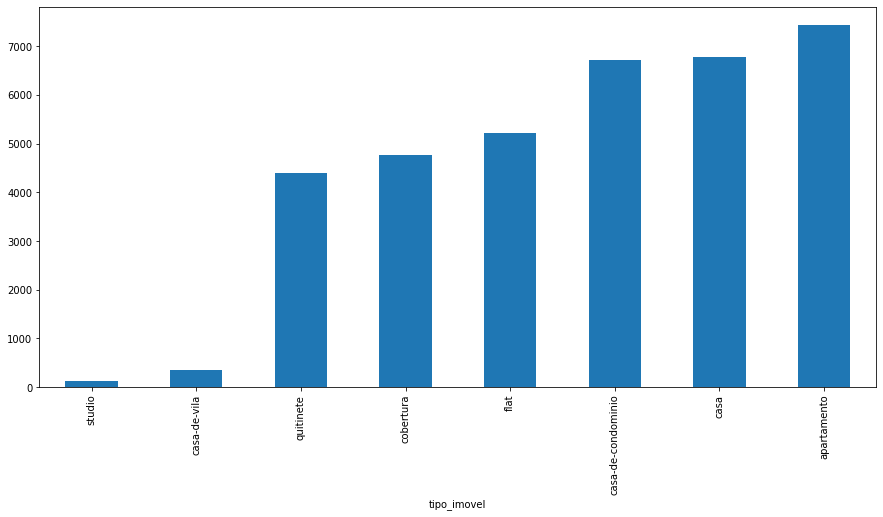

In [200]:
df.groupby(['tipo_imovel'])\
.tipo_imovel \
.count()\
.sort_values()\
.plot(kind='bar', figsize=(15,7),label='tipo_imovel ')

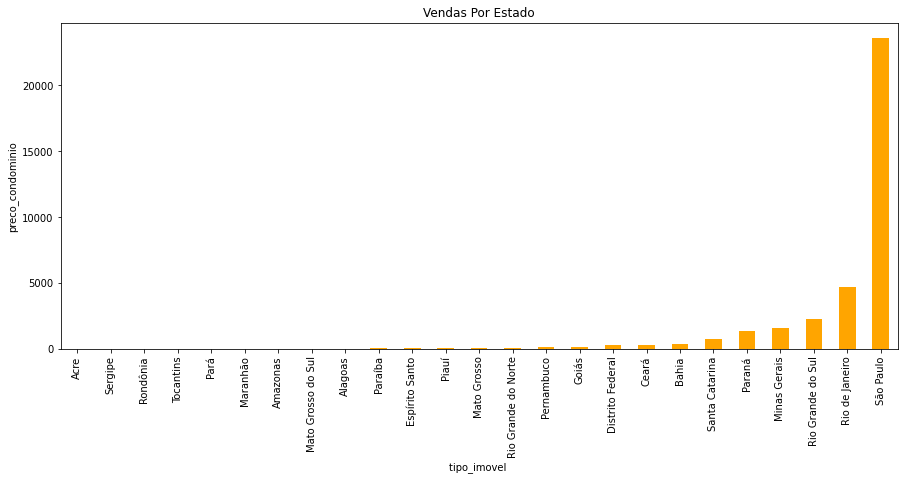

In [201]:
df.groupby(['estado_imovel'])\
.estado_imovel \
.count()\
.sort_values()\
.plot(
    kind='bar',
    color='orange',
    figsize=(15,6),
    title='Vendas Por Estado',
    xlabel='tipo_imovel ',
    ylabel='preco_condominio')

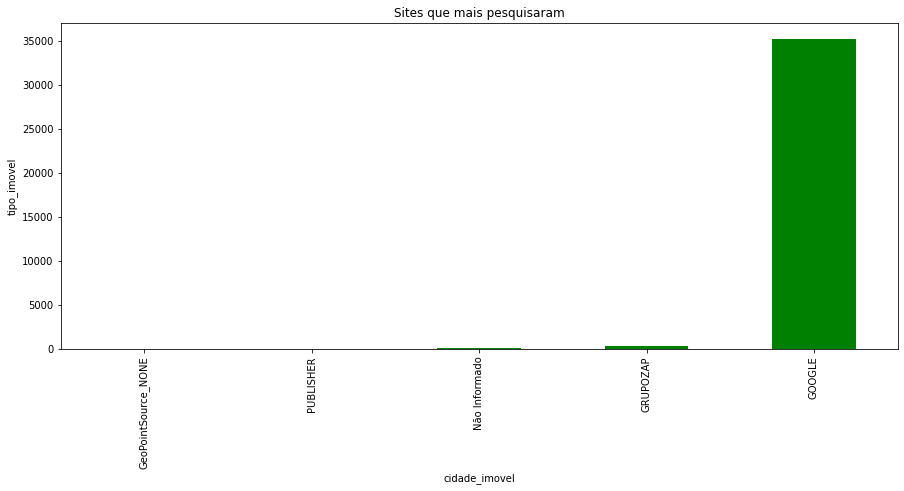

In [202]:
df.groupby(['site_pesquisa'])\
.site_pesquisa\
.count()\
.sort_values()\
.plot(
    kind='bar',
    color='green',
    figsize=(15,6),
    title='Sites que mais pesquisaram',
    xlabel='cidade_imovel',
    ylabel='tipo_imovel'
)


In [203]:
df.head(5)

,nome_empresa,tipo_imovel,cidade_imovel,site_pesquisa,estado_imovel,qtde_banheiros,qtde_quartos,tipo_contrato,mobilhado,academia,desocupado,garagem,area_lazer,piscina,plataforma_digital,preco_condominio,preco_periodo,valor_aluguel,valor_venda,iptu_anual,qtde_suites,quadra_tenis,area_total_m2,andar,residencial_comercial,data
0,ADI Assessoria e Imóveis Ltda,apartamento,São Paulo,GOOGLE,São Paulo,1,2,Aluguel,Não,Não,Não,0,Não,Não,ZAP,50,mês,1.300,<NA>,50,0,Não,45,0,Residencial,2020-06-17
1,San Remos Imóveis,apartamento,Florianópolis,GOOGLE,Santa Catarina,3,3,Aluguel,Não,Não,Não,1,Não,Não,ZAP,1.961,mês,3.600,<NA>,370,1,Não,140,0,Residencial,2020-07-10
2,Família Bacellar Imobiliária,apartamento,Rio de Janeiro,GOOGLE,Rio de Janeiro,3,3,Aluguel,Não,Não,Não,2,Não,Não,ZAP,835,mês,2.100,<NA>,244,1,Não,100,0,Residencial,2020-07-23
3,Next Soluções Imobiliárias,apartamento,Campinas,GOOGLE,São Paulo,2,1,Aluguel,Não,Não,Não,1,Não,Sim,ZAP,134.437,mês,3.000,<NA>,90,0,Não,80,0,Residencial,2016-12-12
4,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamento,São Paulo,GOOGLE,São Paulo,3,2,Aluguel,Não,Não,Não,2,Sim,Sim,ZAP,536,mês,2.600,<NA>,17,2,Não,69,0,Residencial,2020-07-28


In [204]:
client = storage.Client()
bucket = client.get_bucket('projeto-final-grupo09')
     
bucket.blob('saida_dados/Projeto_Final_ZAP_Pandas').upload_from_string(df.to_csv(index=False), 'text/csv')